In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sm

In [83]:
s = sm.symbols('s')
alpha = 4e-7
beta = -3e-2
s0 = [4e4]
delta = 0
gamma = np.linspace(1e-5, 800,1000)
def tao(s,gamma):
    new_missions = delta/s + gamma
    return new_missions

In [124]:
solutions = []
for ga in gamma: 
    ds = alpha * s**2 + beta * s + tao(s,ga)  
    s_star = sm.solve(sm.Eq(ds, 0), s)  
    solutions.append(s_star) 

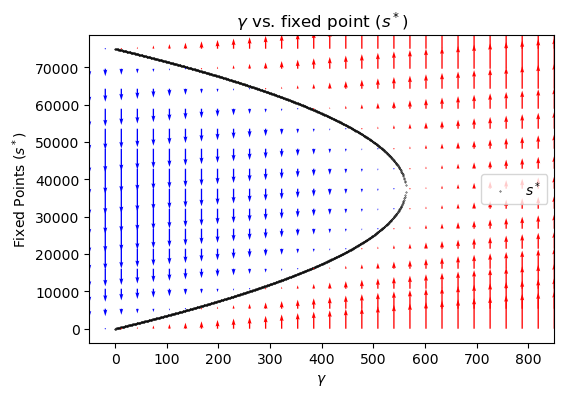

In [136]:
real_solutions = []

# real solution
all_real_solutions = [[float(s.evalf()) for s in sol if s.is_real] for sol in solutions]
x = gamma
x_values = []
s_star_values = []
for i, sol_group in enumerate(all_real_solutions):
    x_values.extend([x[i]] * len(sol_group))  
    s_star_values.extend(sol_group)
s_q, g_q = np.mgrid[min(s_star_values):max(s_star_values):15j,-50:850:30j]
v = alpha * s_q**2 + beta * s_q + tao(s_q, g_q)
u = 0
C = np.where(v < 0, 0, 1) 
plt.figure(figsize=(6, 4))
plt.scatter(x_values, s_star_values, color='black', label='$s^*$', alpha=1, s=0.1)
plt.quiver(g_q, s_q, u, v, C, cmap='bwr')  
plt.xlim(-50,850)
plt.xlabel(r"$\gamma$")
plt.ylabel("Fixed Points ($s^*$)")
plt.title(r"$\gamma$ vs. fixed point ($s^*$)")
plt.legend()
plt.show()